# **Praktikum Mandiri Decision Tree | ML Senin Pagi**

Rika Rahma - 0110222134

# 1. Import Library

In [36]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# 2. Load Load & Eksplorasi Data

In [37]:
# Menghubungkan colab dengan Google Drive
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
# Memanggil dataset lewat Gdrive
path = '/content/gdrive/MyDrive/Praktikum_ML/praktikum05/data/'

In [39]:
# Membaca file CSV menggunakan pandas
df = pd.read_csv(path + 'Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
# Cek informasi kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [41]:
# Cek ada berapa jenis 'Species'
print("--- Jenis Spesies (Target) ---")
print(df['Species'].value_counts())

--- Jenis Spesies (Target) ---
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# 3. Preprocessing Data

In [42]:
# Pisahkan fitur (X) dan target (y)
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_columns]
y_text = df['Species'] # target

In [43]:
# Membuat objek LabelEncoder
le = LabelEncoder()

In [44]:
# Mengubah y_text (teks) menjadi y (numerik)
y = le.fit_transform(y_text)

In [45]:
# Tampilkan hasil encoding
print("--- Hasil Encoding Target ---")
print("Target (Teks):", le.classes_)
print("Target (Numerik):", y[:15]) # Tampilkan 15 data pertama yang sudah di-encode
print("\n")
print("Fitur (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

--- Hasil Encoding Target ---
Target (Teks): ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Target (Numerik): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Fitur (X) shape: (150, 4)
Target (y) shape: (150,)


# 4. Split Data

In [46]:
# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("--- Ukuran Data Split ---")
print("Jumlah data training (X_train):", X_train.shape[0])
print("Jumlah data testing (X_test):", X_test.shape[0])

--- Ukuran Data Split ---
Jumlah data training (X_train): 120
Jumlah data testing (X_test): 30


# 5. Buat & Latih Model (Decision Tree)

In [47]:
# Membuat objek model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)

In [48]:
# Meltih model (fitting) menggunakan data training
model_dt.fit(X_train, y_train)

print("Model Decision Tree berhasil dilatih!")

Model Decision Tree berhasil dilatih!


# 6. Evaluasi Model

--- Akurasi Model ---
Akurasi: 93.33%


--- Classification Report ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



--- Confusion Matrix ---


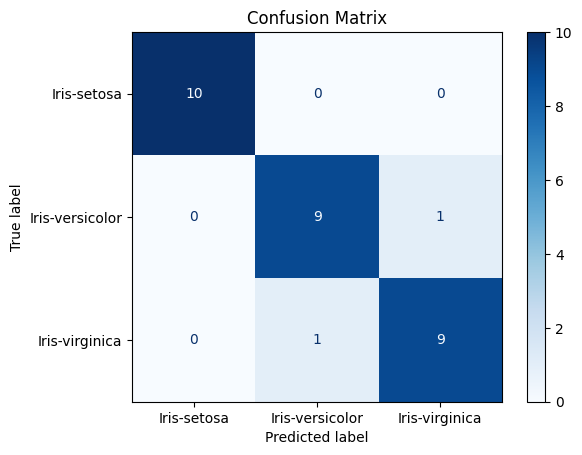

In [49]:
# Menggunakan dataset testing untuk menguji model
y_pred = model_dt.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Akurasi Model ---")
print(f"Akurasi: {accuracy * 100:.2f}%") # Tampilkan dalam persen
print("\n")

# Menampilkan Classification Report (Precision, Recall, F1-Score)
print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("\n")

# Menampilkan Confusion Matrix
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 7. Menggunakan dataset testing untuk menguji model

In [50]:
# Menampilkan perbandingan data asli vs prediksi
y_test_text = le.inverse_transform(y_test)
y_pred_text = le.inverse_transform(y_pred)

print("--- Perbandingan Data Asli vs Hasil Prediksi ---")
hasil = pd.DataFrame({'Data Asli': y_test_text, 'Hasil Prediksi': y_pred_text})
print(hasil.head(10)) # Tampilkan 10 data pertama

--- Perbandingan Data Asli vs Hasil Prediksi ---
         Data Asli   Hasil Prediksi
0      Iris-setosa      Iris-setosa
1   Iris-virginica   Iris-virginica
2  Iris-versicolor  Iris-versicolor
3  Iris-versicolor  Iris-versicolor
4      Iris-setosa      Iris-setosa
5  Iris-versicolor  Iris-versicolor
6      Iris-setosa      Iris-setosa
7      Iris-setosa      Iris-setosa
8   Iris-virginica   Iris-virginica
9  Iris-versicolor  Iris-versicolor
